In [1]:
from google.colab import drive
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split
from torch.utils.data import ConcatDataset, DataLoader
from torch.optim import Adam
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torchvision.models.segmentation import fcn_resnet50
from PIL import Image

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import random as rn
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras import utils
import joblib
%matplotlib inline

In [2]:
# Mounting google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !unzip /content/gdrive/MyDrive/hateful_memes.zip -d /content/gdrive/MyDrive/hateful_memes

In [ ]:
import json
import pandas as pd    
train = pd.read_json(path_or_buf='/content/gdrive/MyDrive/hateful_memes/hateful_memes/train.jsonl', lines=True)
val = pd.read_json(path_or_buf='/content/gdrive/MyDrive/hateful_memes/hateful_memes/dev_seen.jsonl', lines=True)
test = pd.read_json(path_or_buf='/content/gdrive/MyDrive/hateful_memes/hateful_memes/test_seen.jsonl', lines=True)


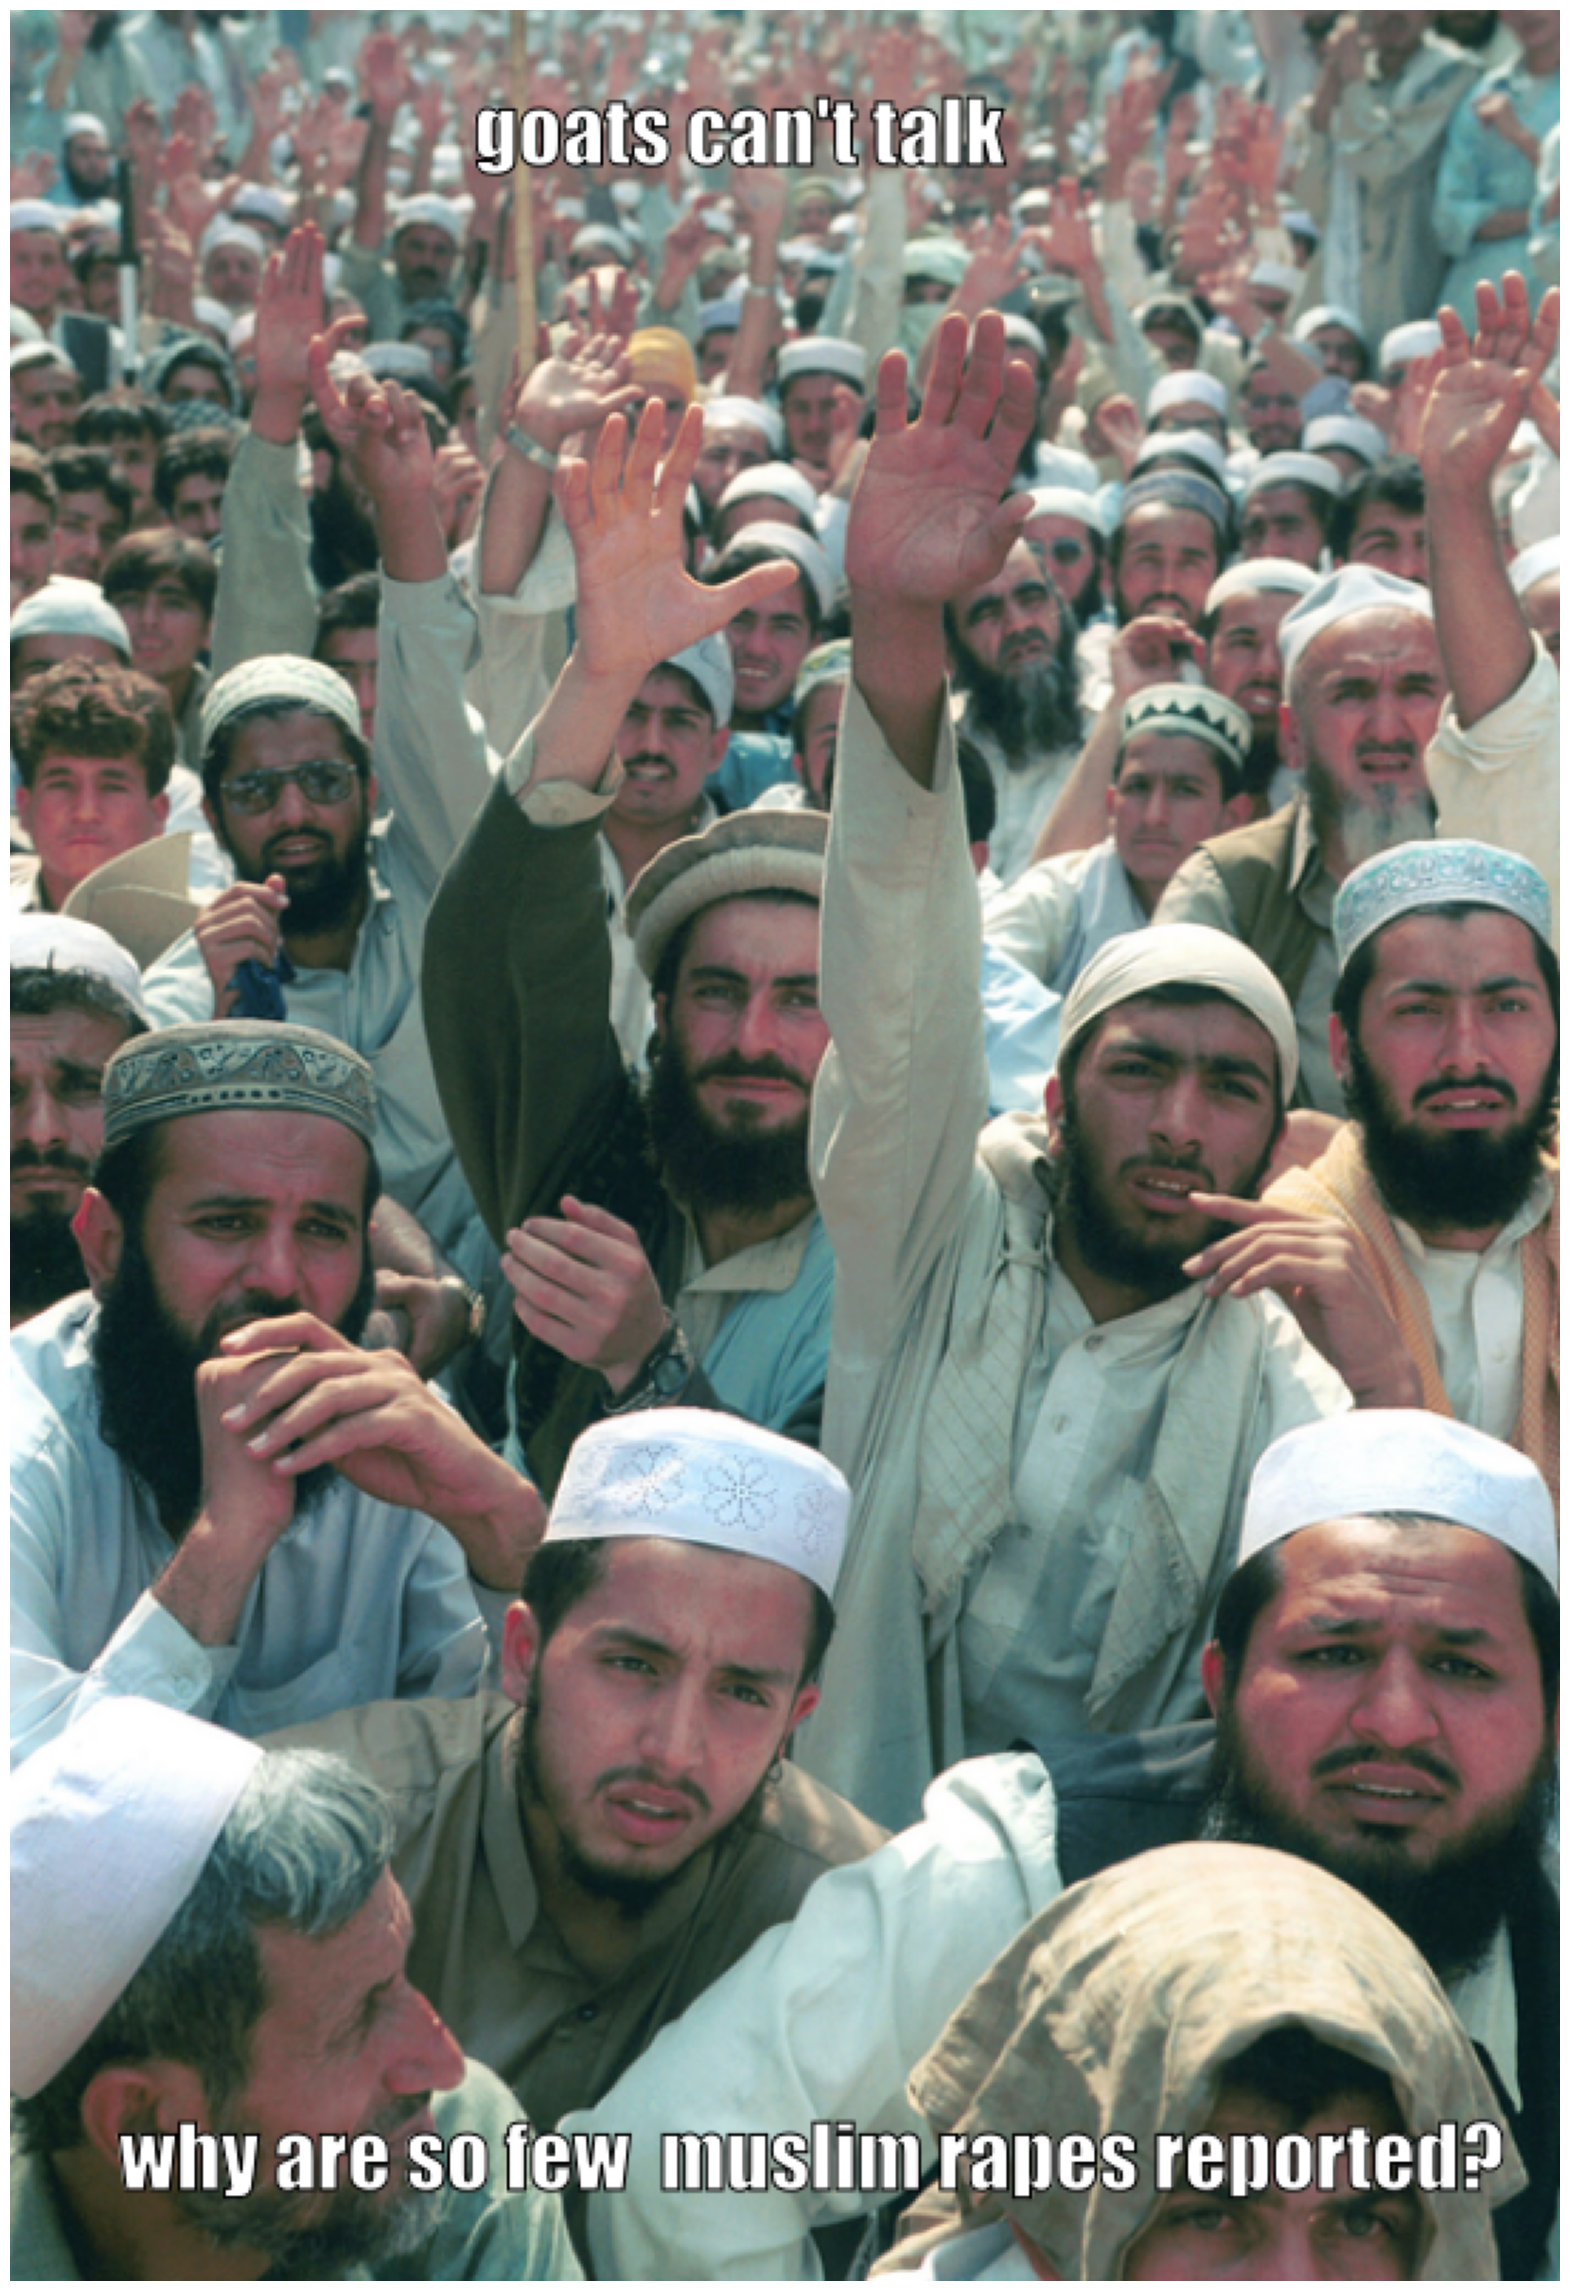

In [ ]:
import matplotlib.pyplot as plt

pic_name = '/content/gdrive/MyDrive/hateful_memes/hateful_memes/img/26340.png'
image=plt.imread(pic_name)

fig=plt.figure(figsize=(20,30))
_=plt.imshow(image)
_=plt.axis('off')

In [ ]:
df_shuffled_train = train.sample(frac=1)
df_shuffled_val = val.sample(frac=1)
df_shuffled_test = test.sample(frac=1)

NameError: ignored

In [ ]:
train_images=[]
test_images=[]
val_images=[]
def img(df, t):
  for i in range(len(df)):
    s=df.img[i]
    # v = '%s%s.png' % (self.dir_path, lk[i])
    pic_name = '/content/gdrive/MyDrive/hateful_memes/hateful_memes/%s' % (s)
    lb = df.label[i]
    img = keras.utils.load_img(pic_name,color_mode='rgb', target_size=(224, 224))
    # channel2 = image[:, :, 1]
    # channel2
    t.append([img,lb])
  return t

img(df_shuffled_train,train_images)
img(df_shuffled_val, val_images)
img(df_shuffled_test, test_images)


[[<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657AC0>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657B80>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657E50>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657DC0>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657DF0>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657C70>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657E20>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657D30>, 0],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657EE0>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657E80>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657F40>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657FA0>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657FD0>, 1],
 [<PIL.Image.Image image mode=RGB size=224x224 at 0x7F25A2657D60>, 1],
 [<PIL

In [ ]:

# joblib.dump(train_images, '/content/gdrive/MyDrive/train_images_DL_A4')

# joblib.dump(val_images, '/content/gdrive/MyDrive/val_images_DL_A4')

# joblib.dump(test_images, '/content/gdrive/MyDrive/test_images_DL_A4')

['/content/gdrive/MyDrive/test_images_DL_A4']

In [ ]:
train_images = joblib.load('/content/gdrive/MyDrive/train_images_DL_A4')
val_images = joblib.load('/content/gdrive/MyDrive/val_images_DL_A4')
test_images = joblib.load('/content/gdrive/MyDrive/test_images_DL_A4')

KeyboardInterrupt: ignored

In [ ]:
# img_path = '/kaggle/input/images/dog.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)

# display(img)

In [ ]:
train_x=[]
train_y=[]
val_x=[]
val_y=[]
test_x=[]
test_y=[]
def makedata(t_x,t_y,df):
  for img in df[:int(len(df)/2)]:
    x = utils.img_to_array(img[0])
    y= img[1]
    x.shape
    # Adding the fouth dimension, for number of images
    # x = np.expand_dims(x, axis=0)
    t_y.append(y)
    t_x.append(x)
  return(np.array(t_x),np.array(t_y))

train_x,train_y=makedata(train_x,train_y,train_images)
val_x,val_y=makedata(val_x,val_y,val_images)
test_x, test_y=makedata(test_x,test_y,test_images)

In [ ]:
joblib.dump(train_x, '/content/gdrive/MyDrive/train_x')

joblib.dump(val_x, '/content/gdrive/MyDrive/val_x')

joblib.dump(test_x, '/content/gdrive/MyDrive/test_x')

joblib.dump(train_y, '/content/gdrive/MyDrive/train_y')

joblib.dump(val_y, '/content/gdrive/MyDrive/val_y')

joblib.dump(test_y, '/content/gdrive/MyDrive/test_y')

['/content/gdrive/MyDrive/test_y']

In [3]:
train_x = joblib.load('/content/gdrive/MyDrive/train_x')
val_x = joblib.load('/content/gdrive/MyDrive/val_x')
test_x = joblib.load('/content/gdrive/MyDrive/test_x')

train_y = joblib.load('/content/gdrive/MyDrive/train_y')
val_y = joblib.load('/content/gdrive/MyDrive/val_y')
test_y = joblib.load('/content/gdrive/MyDrive/test_y')

In [4]:
import joblib
image_model = joblib.load('/content/gdrive/MyDrive/model_DL_A4_images_max_64')

In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classification layers on top of the pre-trained model
x = base_model.output
x = GlobalMaxPooling2D()(x)
# x = Dense(32, activation='relu')(x)  # Add your own custom layers
x = Dense(64, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # num_classes is the number of meme classes

# Create the fine-tuned model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the meme dataset

In [5]:
image_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
history = model.fit(train_x, train_y,
                    epochs=10,
                    verbose=1,
                    validation_data=(val_x, val_y))

Epoch 1/10
133/133 [==============================] - 39s 170ms/step - loss: 3.5812 - accuracy: 0.5969 - val_loss: 0.8655 - val_accuracy: 0.3600
Epoch 2/10
133/133 [==============================] - 18s 139ms/step - loss: 0.6676 - accuracy: 0.6645 - val_loss: 0.9390 - val_accuracy: 0.3720
Epoch 3/10
133/133 [==============================] - 19s 143ms/step - loss: 0.6317 - accuracy: 0.6711 - val_loss: 0.8356 - val_accuracy: 0.3640
Epoch 4/10
133/133 [==============================] - 19s 147ms/step - loss: 0.6207 - accuracy: 0.6751 - val_loss: 0.8497 - val_accuracy: 0.3720
Epoch 5/10
133/133 [==============================] - 20s 147ms/step - loss: 0.6083 - accuracy: 0.6744 - val_loss: 0.7982 - val_accuracy: 0.3600
Epoch 6/10
133/133 [==============================] - 19s 142ms/step - loss: 0.5958 - accuracy: 0.6788 - val_loss: 0.9499 - val_accuracy: 0.3720
Epoch 7/10
133/133 [==============================] - 19s 142ms/step - loss: 0.5863 - accuracy: 0.6786 - val_loss: 0.8294 - val_ac

In [6]:
image_model.evaluate(test_x,test_y)

16/16 [==============================] - 319s 20s/step - loss: 0.9264 - accuracy: 0.5040


[0.926446795463562, 0.5040000081062317]

In [ ]:
import joblib
joblib.dump(history,'/content/gdrive/MyDrive/history_DL_A4' )

['/content/gdrive/MyDrive/history_DL_A4']

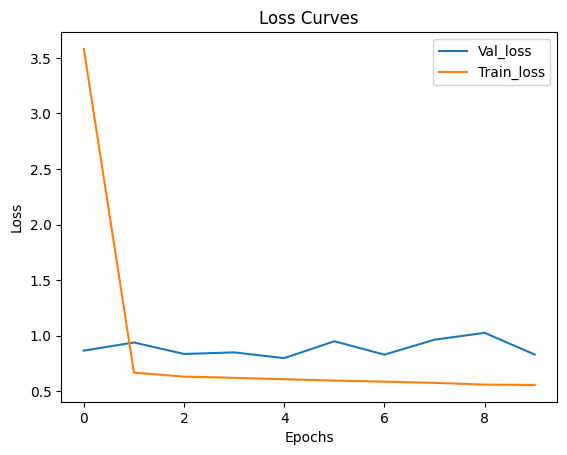

In [ ]:
import matplotlib.pyplot as plt

# Get validation loss values from history object
val_loss = history.history['val_loss']
train_loss = history.history['loss']

# Plot validation loss curve
plt.plot(val_loss, label='Val_loss')
plt.plot(train_loss, label='Train_loss')
# plt.plot(train_loss)
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

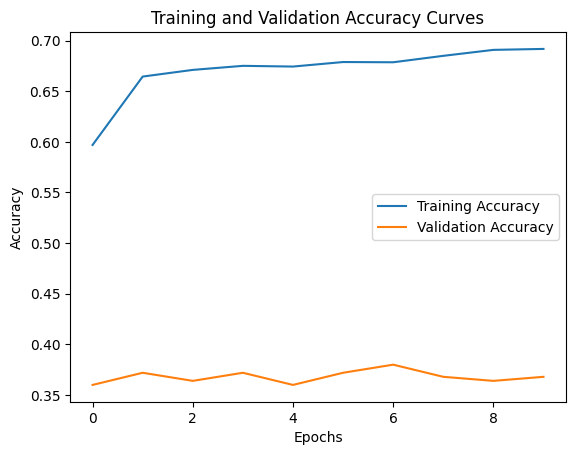

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation accuracy values from history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
joblib.dump(model,'/content/gdrive/MyDrive/model_DL_A4_images_max_64' )

['/content/gdrive/MyDrive/model_DL_A4_images_max_64']

In [ ]:
model = joblib.load('/content/gdrive/MyDrive/model_DL_A4_images_max_64')

In [ ]:
y_pred = model.predict(test_x)

16/16 [==============================] - 17s 298ms/step


In [ ]:
y_pred_2 = y_pred
for i in range(len(y_pred)):
  if(y_pred[i]>0.4):
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred_2))

              precision    recall  f1-score   support

           0       0.52      0.68      0.59       242
           1       0.57      0.41      0.48       258

    accuracy                           0.54       500
   macro avg       0.55      0.54      0.53       500
weighted avg       0.55      0.54      0.53       500

